##  1 Optimization problem example

For a circular cylindrical can:
$$S = 2 \pi r^2 + 2 \pi r h$$
$$V = \pi r^2 h$$
Hence:
$h = \frac{V}{\pi r^2}$ and 
$$S = 2 \pi r^2 + \frac{2V}{r}$$
Then 
$$\frac{dS}{dr} = 4 \pi r_* - \frac{2V}{r_*^2} = 0$$

$$r_* = \left(\frac{V}{2 \pi} \right)^{1/3}$$

But also we can derive $r = \sqrt{\frac{V}{\pi h}}$
$$S = \frac{2V}{h} + 2\sqrt{V \pi h}$$

$$\frac{dS}{dh} = -\frac{2V}{h_*^2} + \sqrt{\frac{V \pi}{h_*}} = 0$$

$$h_* = \left(2\sqrt{\frac{V}{\pi}} \right)^{2/3} = 2r_*$$

So, $r_* = \left(\frac{V}{2 \pi} \right)^{1/3}$, $h_* = 2r_*$.

##  2 Optimality conditions

To find an optimum: 



$$\frac{\partial f}{\partial x_1} = 3 x_1 + (1 + a) x_2 - 1 = 0$$

$$\frac{\partial f}{\partial x_1} = 3 x_2 + (1 + a) x_1 - 1 = 0$$

We can derive 

$$x_1 = \frac{1 - (1 + a)x_2}{3}$$

then

$$3 x_2 + \frac{(1 + a)}{3} - \frac{(1 + a)^2 x_2}{3} - 1 = 0$$

$$x_2 = \frac{(3 - (1 + a))}{(3 - (1 + a))(3 + (1 + a))} = \frac{1}{a + 4}, \ \ \ \text{if} \ \ a \neq -4, 2$$

$$x_1 = \frac{1}{a + 4}, \ \ \ \text{if} \ \ a \neq -4, 2$$

If $a = -4$ system has no solution, if $a = 2$, then

$$x_1 = \frac{1 - 3 x_2}{3}$$

and system has infinite number of solutions.

Then let us check the sufficient condition:

$$\frac{\partial^2 f}{\partial^2 x_1} = \frac{\partial^2 f}{\partial^2 x_2} = 3$$

$$\frac{\partial^2 f}{\partial x_1 \partial x_2} = \frac{\partial^2 f}{\partial x_2 \partial x_1} = 1 + a $$

Hessian of this function is 

$$H = \begin{pmatrix}
3 & (1+a) \\
(1+a) & 3
\end{pmatrix} $$

If $H$ is positive definite, then $f$ has a minimum value. 

$3 > 0$, then $H$ is positive definite if $det(H)>0$, then $9 - (1 + a)^2 > 0$, 

$|1 + a| < 3$, i.e. $a \in (-4, 2)$

So, problem has unique optimtimal solution if $a \in (-4, 2)$ and $b$ is an arbitrary number.

## 3 Nelder Mead method 

In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [2]:
def birds(x):
    if (x[0] + 5)**2 + (x[1] + 5)**2 < 25:
        return np.sin(x[1]) * np.exp((1 - np.cos(x[0]))**2) + np.cos(x[0]) * np.exp((1 - np.sin(x[1]))**2) + (x[0] - x[1])**2
    else:
        return np.inf

Fortunately, the Nelder-Mead method is already implemented in ```scipy```, so we can use the function from there.

We start from the initial point $x_0 = (-3, -4)$

In [3]:
sim = minimize(birds, x0 = [-3., -4.], method='Nelder-Mead', options={'disp': True, 'return_all': True})

Optimization terminated successfully.
         Current function value: -106.764537
         Iterations: 38
         Function evaluations: 75


In [4]:
values = sim.get('allvecs')

x = []
y = []

for i in range(len(values)):
    x.append(values[i][0])
    y.append(values[i][1])

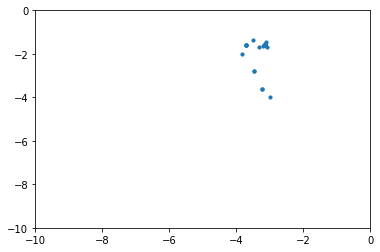

In [5]:
plt.scatter(x, y, 10)
plt.xlim([-10, 0])
plt.ylim([-10, 0]);

In [6]:
x_star = sim.get('x')
print(f'The local optimal point is {x_star}')

The local optimal point is [-3.13021145 -1.58214571]


Let us start from the differnet initial point

Now we start from the initial point $x_0 = (-4, -6)$

In [7]:
sim = minimize(birds, x0 = [-4., -6.], method='Nelder-Mead', options={'disp': True, 'return_all': True})

Optimization terminated successfully.
         Current function value: -87.310883
         Iterations: 37
         Function evaluations: 72


In [8]:
values = sim.get('allvecs')

x = []
y = []

for i in range(len(values)):
    x.append(values[i][0])
    y.append(values[i][1])

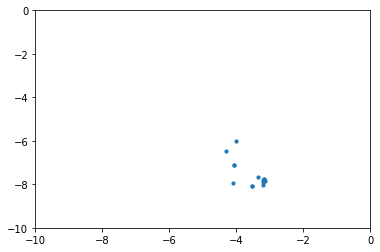

In [9]:
plt.scatter(x, y, 10)
plt.xlim([-10, 0])
plt.ylim([-10, 0]);

We can see that method has converged to another point.

In [10]:
x_star = sim.get('x')
print(f'Another local optimal point is {x_star}')

Another local optimal point is [-3.17576194 -7.81986757]


In [11]:
oracle_calls = sim.get('nfev')
print(f'The number of function evaluations is {oracle_calls}')

The number of function evaluations is 72


To examine the behavior of the method for various parameters we need to go deeper in ```scipy``` code and chage parameters there 

In [12]:
import numpy
from numpy import (atleast_1d, eye, mgrid, argmin, zeros, shape, squeeze,
                   vectorize, asarray, sqrt, Inf, asfarray, isinf)

_status_message = {'success': 'Optimization terminated successfully.',
                   'maxfev': 'Maximum number of function evaluations has '
                              'been exceeded.',
                   'maxiter': 'Maximum number of iterations has been '
                              'exceeded.',
                   'pr_loss': 'Desired error not necessarily achieved due '
                              'to precision loss.'}

class OptimizeResult(dict):
    """ Represents the optimization result.
    Attributes
    ----------
    x : ndarray
        The solution of the optimization.
    success : bool
        Whether or not the optimizer exited successfully.
    status : int
        Termination status of the optimizer. Its value depends on the
        underlying solver. Refer to `message` for details.
    message : str
        Description of the cause of the termination.
    fun, jac, hess: ndarray
        Values of objective function, its Jacobian and its Hessian (if
        available). The Hessians may be approximations, see the documentation
        of the function in question.
    hess_inv : object
        Inverse of the objective function's Hessian; may be an approximation.
        Not available for all solvers. The type of this attribute may be
        either np.ndarray or scipy.sparse.linalg.LinearOperator.
    nfev, njev, nhev : int
        Number of evaluations of the objective functions and of its
        Jacobian and Hessian.
    nit : int
        Number of iterations performed by the optimizer.
    maxcv : float
        The maximum constraint violation.
    Notes
    -----
    There may be additional attributes not listed above depending of the
    specific solver. Since this class is essentially a subclass of dict
    with attribute accessors, one can see which attributes are available
    using the `keys()` method.
    """
    def __getattr__(self, name):
        try:
            return self[name]
        except KeyError:
            raise AttributeError(name)

    __setattr__ = dict.__setitem__
    __delattr__ = dict.__delitem__

    def __repr__(self):
        if self.keys():
            m = max(map(len, list(self.keys()))) + 1
            return '\n'.join([k.rjust(m) + ': ' + repr(v)
                              for k, v in sorted(self.items())])
        else:
            return self.__class__.__name__ + "()"

    def __dir__(self):
        return list(self.keys())

In [13]:
def _check_unknown_options(unknown_options):
    if unknown_options:
        msg = ", ".join(map(str, unknown_options.keys()))
        # Stack level 4: this is called from _minimize_*, which is
        # called from another function in Scipy. Level 4 is the first
        # level in user code.
        warnings.warn("Unknown solver options: %s" % msg, OptimizeWarning, 4)

In [14]:
def wrap_function(function, args):
    ncalls = [0]
    if function is None:
        return ncalls, None

    def function_wrapper(*wrapper_args):
        ncalls[0] += 1
        return function(*(wrapper_args + args))

    return ncalls, function_wrapper

In [15]:
def _minimize_neldermead(func, x0, rho=1, chi=2, psi=0.5, sigma=0.5, args=(), callback=None,
                         maxiter=None, maxfev=None, disp=False,
                         return_all=False, initial_simplex=None,
                         xatol=1e-4, fatol=1e-4, adaptive=False,
                         **unknown_options):
    """
    Minimization of scalar function of one or more variables using the
    Nelder-Mead algorithm.
    Options
    -------
    disp : bool
        Set to True to print convergence messages.
    maxiter, maxfev : int
        Maximum allowed number of iterations and function evaluations.
        Will default to ``N*200``, where ``N`` is the number of
        variables, if neither `maxiter` or `maxfev` is set. If both
        `maxiter` and `maxfev` are set, minimization will stop at the
        first reached.
    initial_simplex : array_like of shape (N + 1, N)
        Initial simplex. If given, overrides `x0`.
        ``initial_simplex[j,:]`` should contain the coordinates of
        the j-th vertex of the ``N+1`` vertices in the simplex, where
        ``N`` is the dimension.
    xatol : float, optional
        Absolute error in xopt between iterations that is acceptable for
        convergence.
    fatol : number, optional
        Absolute error in func(xopt) between iterations that is acceptable for
        convergence.
    adaptive : bool, optional
        Adapt algorithm parameters to dimensionality of problem. Useful for
        high-dimensional minimization [1]_.
    References
    ----------
    .. [1] Gao, F. and Han, L.
       Implementing the Nelder-Mead simplex algorithm with adaptive
       parameters. 2012. Computational Optimization and Applications.
       51:1, pp. 259-277
    """
    if 'ftol' in unknown_options:
        warnings.warn("ftol is deprecated for Nelder-Mead,"
                      " use fatol instead. If you specified both, only"
                      " fatol is used.",
                      DeprecationWarning)
        if (np.isclose(fatol, 1e-4) and
                not np.isclose(unknown_options['ftol'], 1e-4)):
            # only ftol was probably specified, use it.
            fatol = unknown_options['ftol']
        unknown_options.pop('ftol')
    if 'xtol' in unknown_options:
        warnings.warn("xtol is deprecated for Nelder-Mead,"
                      " use xatol instead. If you specified both, only"
                      " xatol is used.",
                      DeprecationWarning)
        if (np.isclose(xatol, 1e-4) and
                not np.isclose(unknown_options['xtol'], 1e-4)):
            # only xtol was probably specified, use it.
            xatol = unknown_options['xtol']
        unknown_options.pop('xtol')

    _check_unknown_options(unknown_options)
    maxfun = maxfev
    retall = return_all

    fcalls, func = wrap_function(func, args)

    if adaptive:
        dim = float(len(x0))
        rho = 1
        chi = 1 + 2/dim
        psi = 0.75 - 1/(2*dim)
        sigma = 1 - 1/dim
    else:
        ################################################################################################################
        ##########################################PARAMETERS############################################################
        ################################################################################################################
        rho = rho
        chi = chi
        psi = psi
        sigma = sigma
        ################################################################################################################
        ################################################################################################################
        ################################################################################################################

    nonzdelt = 0.05
    zdelt = 0.00025

    x0 = asfarray(x0).flatten()

    if initial_simplex is None:
        N = len(x0)

        sim = numpy.zeros((N + 1, N), dtype=x0.dtype)
        sim[0] = x0
        for k in range(N):
            y = numpy.array(x0, copy=True)
            if y[k] != 0:
                y[k] = (1 + nonzdelt)*y[k]
            else:
                y[k] = zdelt
            sim[k + 1] = y
    else:
        sim = np.asfarray(initial_simplex).copy()
        if sim.ndim != 2 or sim.shape[0] != sim.shape[1] + 1:
            raise ValueError("`initial_simplex` should be an array of shape (N+1,N)")
        if len(x0) != sim.shape[1]:
            raise ValueError("Size of `initial_simplex` is not consistent with `x0`")
        N = sim.shape[1]

    if retall:
        allvecs = [sim[0]]

    # If neither are set, then set both to default
    if maxiter is None and maxfun is None:
        maxiter = N * 200
        maxfun = N * 200
    elif maxiter is None:
        # Convert remaining Nones, to np.inf, unless the other is np.inf, in
        # which case use the default to avoid unbounded iteration
        if maxfun == np.inf:
            maxiter = N * 200
        else:
            maxiter = np.inf
    elif maxfun is None:
        if maxiter == np.inf:
            maxfun = N * 200
        else:
            maxfun = np.inf

    one2np1 = list(range(1, N + 1))
    fsim = numpy.zeros((N + 1,), float)

    for k in range(N + 1):
        fsim[k] = func(sim[k])

    ind = numpy.argsort(fsim)
    fsim = numpy.take(fsim, ind, 0)
    # sort so sim[0,:] has the lowest function value
    sim = numpy.take(sim, ind, 0)

    iterations = 1

    while (fcalls[0] < maxfun and iterations < maxiter):
        if (numpy.max(numpy.ravel(numpy.abs(sim[1:] - sim[0]))) <= xatol and
                numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):
            break

        xbar = numpy.add.reduce(sim[:-1], 0) / N
        xr = (1 + rho) * xbar - rho * sim[-1]
        fxr = func(xr)
        doshrink = 0

        if fxr < fsim[0]:
            xe = (1 + rho * chi) * xbar - rho * chi * sim[-1]
            fxe = func(xe)

            if fxe < fxr:
                sim[-1] = xe
                fsim[-1] = fxe
            else:
                sim[-1] = xr
                fsim[-1] = fxr
        else:  # fsim[0] <= fxr
            if fxr < fsim[-2]:
                sim[-1] = xr
                fsim[-1] = fxr
            else:  # fxr >= fsim[-2]
                # Perform contraction
                if fxr < fsim[-1]:
                    xc = (1 + psi * rho) * xbar - psi * rho * sim[-1]
                    fxc = func(xc)

                    if fxc <= fxr:
                        sim[-1] = xc
                        fsim[-1] = fxc
                    else:
                        doshrink = 1
                else:
                    # Perform an inside contraction
                    xcc = (1 - psi) * xbar + psi * sim[-1]
                    fxcc = func(xcc)

                    if fxcc < fsim[-1]:
                        sim[-1] = xcc
                        fsim[-1] = fxcc
                    else:
                        doshrink = 1

                if doshrink:
                    for j in one2np1:
                        sim[j] = sim[0] + sigma * (sim[j] - sim[0])
                        fsim[j] = func(sim[j])

        ind = numpy.argsort(fsim)
        sim = numpy.take(sim, ind, 0)
        fsim = numpy.take(fsim, ind, 0)
        if callback is not None:
            callback(sim[0])
        iterations += 1
        if retall:
            allvecs.append(sim[0])

    x = sim[0]
    fval = numpy.min(fsim)
    warnflag = 0

    if fcalls[0] >= maxfun:
        warnflag = 1
        msg = _status_message['maxfev']
        if disp:
            print('Warning: ' + msg)
    elif iterations >= maxiter:
        warnflag = 2
        msg = _status_message['maxiter']
        if disp:
            print('Warning: ' + msg)
    else:
        msg = _status_message['success']
        if disp:
            print(msg)
            print("         Current function value: %f" % fval)
            print("         Iterations: %d" % iterations)
            print("         Function evaluations: %d" % fcalls[0])

    result = OptimizeResult(fun=fval, nit=iterations, nfev=fcalls[0],
                            status=warnflag, success=(warnflag == 0),
                            message=msg, x=x, final_simplex=(sim, fsim))
    if retall:
        result['allvecs'] = allvecs
    return result

In [17]:
rho=1
chi=2
psi=0.5
sigma=0.5

In [18]:
sim = _minimize_neldermead(birds, [-5., -2.75], rho=rho, chi=chi, psi=psi, sigma=sigma, disp=True, return_all=True)

Optimization terminated successfully.
         Current function value: -106.764537
         Iterations: 41
         Function evaluations: 81


In [19]:
x_star = sim.get('x')
print(f'The local optimal point is {x_star}')
print(f'Parameter values are {[rho, chi, psi, sigma]}')

The local optimal point is [-3.13024536 -1.58211848]
Parameter values are [1, 2, 0.5, 0.5]


In [20]:
rho=9
chi=3
psi=0.5
sigma=0.5

In [21]:
sim = _minimize_neldermead(birds, [-5., -2.75], rho=rho, chi=chi, psi=psi, sigma=sigma, disp=True, return_all=True)

Optimization terminated successfully.
         Current function value: -1.873123
         Iterations: 46
         Function evaluations: 93


In [22]:
x_star = sim.get('x')
print(f'The local optimal point is {x_star}')
print(f'Parameter values are {[rho, chi, psi, sigma]}')

The local optimal point is [-3.94895657 -3.1089492 ]
Parameter values are [9, 3, 0.5, 0.5]


Generally speaking, if we change the parameters, then as we see it can converge but not quite to the local minimum.

## 4 Coordinate descend

In [23]:
import numpy as np

In [24]:
def RandomCoorDescent(f, x0, num_iter):
    
    x = x0
    
    for i in range(num_iter):
                
        h = 0.01
        
        l = int(np.random.choice(2, 1))
        
        if l==0:
            e = np.array([1, 0])
        else:
            e = np.array([0, 1])
            
        alpha = 1. / (i + 1) * 0.1
        
        x_new = np.copy(x)
                
        x_new[l] = x[l] - alpha * (f(x + h * e) - f(x)) / h
        
        if np.linalg.norm(f(x_new) - f(x)) < 1e-4:
            return {'x': x_new, 'num_iter': i, 'f_val': f(x_new)}
        
        x = x_new
        
    return {'x': x_new, 'num_iter': i, 'f_val': f(x_new)}

$$x_{k+1}^{(i)} = x_{k}^{(i)} - \alpha_k \frac{f(x_k + h e_i) - f(x)}{h}$$

Parameters:
$$a_k = \frac{1}{k} \alpha_0$$
$$\alpha_0 = 0.1 \ \ \ \ h = 0.01$$

$x_0 = (-4, -6)$

In [25]:
des = RandomCoorDescent(birds, [-4., -6.], 1000)
des

{'x': array([-3.14770177, -7.82886918]),
 'num_iter': 20,
 'f_val': -87.19185486879636}

In [26]:
x_star = list(des['x'])
print(f'The local optimal point is {x_star}')

The local optimal point is [-3.1477017704401407, -7.828869176983157]


Number of function evaluations is number of iterations times 2

In [27]:
f_eval = des['num_iter'] * 2
print(f'The number of function evaluations is {f_eval}')

The number of function evaluations is 40


In [28]:
val = des['f_val']
print(f'The local optimal value of the function is {val}')

The local optimal value of the function is -87.19185486879636


Actually, in this case we even managed to surpass Nelder Mead method, according to the speed of convergence, but this is just luck, besides this algorithm behaves unstably with this function and sometimes gives incorrect results.

In [29]:
des = RandomCoorDescent(birds, [-4., -6.], 1000)
des

{'x': array([-5.37595502, -5.80657853]),
 'num_iter': 20,
 'f_val': 1.5426859101692936}

For another initial point we have slightly different results

$x_0 = (-3, -4)$

In [31]:
des = RandomCoorDescent(birds, [-3., -4.], 1000)
des

{'x': array([-3.12254517, -1.58732212]),
 'num_iter': 121,
 'f_val': -106.75263018128757}

In [32]:
x_star = list(des['x'])
print(f'The local optimal point is {x_star}')

The local optimal point is [-3.1225451720194837, -1.5873221168595228]


In [33]:
f_eval = des['num_iter'] * 2
print(f'The number of function evaluations is {f_eval}')

The number of function evaluations is 242


In [34]:
val = des['f_val']
print(f'The local optimal value of the function is {val}')

The local optimal value of the function is -106.75263018128757


In this case Nelder Mead method performs better. But sometimes gives incorrect results:

In [37]:
des = RandomCoorDescent(birds, [-3., -4.], 1000)
des

{'x': array([nan, nan]), 'num_iter': 999, 'f_val': inf}

(But this is simply due to the fact that we have defined the function in this way, in a good way, we can think of the reflection conditions from the boundaries or simply restart the cycle.)